In [1]:
import jax.numpy as jnp
import jax
import os

jax.config.update('jax_default_device',jax.devices()[1])
jax.config.update('jax_enable_x64',True)

from jsindy.trajectory_model import DataAdaptedRKHSInterpolant
from jsindy.sindy_model import JSINDyModel
from jsindy.dynamics_model import FeatureLinearModel
from jsindy.optim import LMSolver, AlternatingActiveSetLMSolver

from equinox import tree_pprint
import matplotlib.pyplot as plt

In [2]:
t = jnp.linspace(0,10,50)
x = jnp.vstack(
    [jnp.cos(4*t),jnp.sin(4*t)]
).T


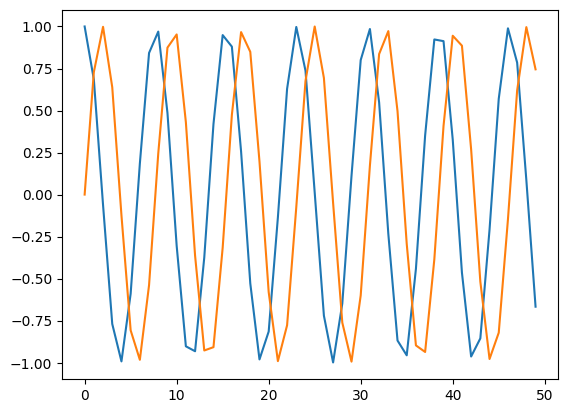

In [3]:
plt.plot(x)
plt.show()

In [4]:
traj_model = DataAdaptedRKHSInterpolant()
dynamics_model = FeatureLinearModel()

In [5]:
model = JSINDyModel(
    traj_model,
    dynamics_model,
    optimizer=AlternatingActiveSetLMSolver()
    )

In [6]:
model.fit(t,x)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Warm Start


  0%|          | 0/501 [00:00<?, ?it/s]

Iteration 0, loss = 1.505e+05, gradnorm = 2.049e+07, alpha = 2.5, improvement_ratio = 1.0
Iteration 1, loss = 9.79e+04, gradnorm = 2.109e+04, alpha = 729.8, improvement_ratio = 0.4119
Iteration 2, loss = 1.383e+04, gradnorm = 2.378e+07, alpha = 83.33, improvement_ratio = 0.8614
Iteration 3, loss = 73.27, gradnorm = 1.302e+07, alpha = 69.44, improvement_ratio = 0.9998
Iteration 4, loss = 67.74, gradnorm = 7.515e+05, alpha = 57.87, improvement_ratio = 1.0
Iteration 5, loss = 67.2, gradnorm = 1.468e+03, alpha = 48.23, improvement_ratio = 0.9998
Iteration 200, loss = 66.57, gradnorm = 1.157e-05, alpha = 949.2, improvement_ratio = 37.67
Line Search Failed!
Final Iteration Results
Iteration 320, loss = 66.57, gradnorm = 1.014e-05, alpha = 3.99e+05, improvement_ratio = -6.765
Alternating Activeset Sparsifier
4 active coeffs changed
Active set stabilized


In [9]:
model.theta.reshape(2,-1)

Array([[ 0.        ,  0.        ,  0.        ,  3.99993548, -3.99996286,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]], dtype=float64)

In [10]:
model.print()

(x0)' = -4.000 x1
(x1)' = 4.000 x0


In [11]:
model.theta

Array([[ 0.        ,  0.        ],
       [ 0.        ,  3.99993548],
       [-3.99996286,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]], dtype=float64)

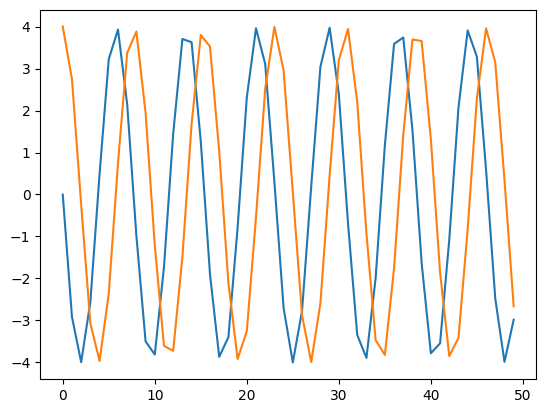

In [14]:
xdot = model.dynamics_model.predict(x,model.theta)
plt.plot(xdot[:,0])
plt.plot(xdot[:,1])

In [15]:
model.z

Array([-0.00487812, -0.01779093, -0.00458785, ...,  1.45898739,
        1.39831778,  2.72937861], dtype=float64)

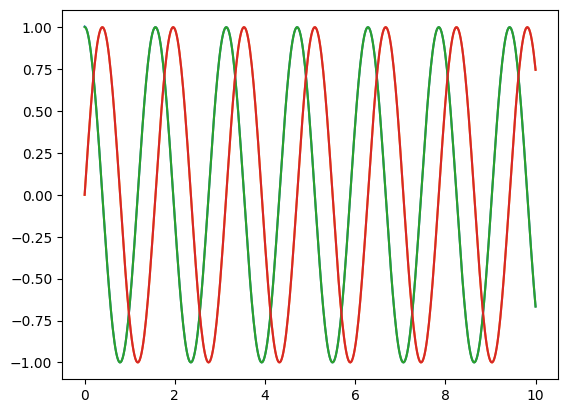

In [20]:
t_grid = jnp.linspace(0,10,500)
xhat = model.traj_model(t_grid,model.z)
plt.plot(t_grid,xhat[:,0])
plt.plot(t_grid,xhat[:,1])


xx = jnp.vstack(
    [jnp.cos(4*t_grid),jnp.sin(4*t_grid)]
).T

plt.plot(t_grid,xx[:,0])
plt.plot(t_grid,xx[:,1])


In [29]:
tm = model.traj_model
dm = model.dynamics_model
z = model.z
theta = model.theta
X = tm(t_grid,z)
xdot = tm.derivative(t_grid,z,diff_order = 1)

In [32]:
jnp.max(jnp.abs(dm.feature_map(X)@theta - xdot))

Array(0.01949616, dtype=float64)